In [155]:
import agent
from model import Model
from parameters import parameters as par
from modules.utils import Struct # GH functions
from collections import namedtuple
from modules.stategrid import create_statespace, create_grids
import pandas as pd
from modules.consumptionpreference import create_consumption_preference_array
from modules.agepolynomial import create_age_poly_array
import numpy as np
from modules import stategrid

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt


## How attractive is it to invest in the risky asset?

In [212]:
# Function that returns cummulative return over the time-horizon as a function of financial literacy
def cum_ret(shocks, par, f = 0):
    a = agent.R_riskful(f, par, shocks)
    a_cr = []
    for i in range(len(a)):
        a_cr.append(np.prod(a[:i+1]))
    return a_cr

In [221]:
# Function that returns cummulative return over the time-horizon as a function of financial literacy averaged over all shocks
def cum_ret_avg(shocks, par, f = 0):
    a_cr = np.zeros(shocks.shape[1]) # Initialize cummalative return
    for j in range(len(shocks)):       
        a = agent.R_riskful(f, par, shocks[j])
        a_cr_j = []   
        for i in range(len(a)):
            a_cr_j.append(np.prod(a[:i+1]))
        a_cr = np.add(a_cr, a_cr_j)       
    return a_cr/len(shocks)

In [222]:
np.random.seed(2510)
n_persons = 1000
timesteps = 20
shock_scale = 0.1
safe_return = 1.02

shocks = np.exp(np.random.normal(size=(n_persons,timesteps), loc = 0,  scale=shock_scale))

# Calculate cummulative return on safe asset
safe_cr = []
for i in range(timesteps):
    safe_cr.append(safe_return**i)

In [235]:
f0_cr = cum_ret_avg(shocks, par, f = 0)
f10_cr = cum_ret_avg(shocks, par, f = 10)
f50_cr = cum_ret_avg(shocks, par, f = 20)

In [224]:
#f0_cr = cum_ret(shocks[1], par, f = 0)
#f10_cr = cum_ret(shocks[1], par, f = 10)
#f50_cr = cum_ret(shocks[1], par, f = 50)

## Plot results

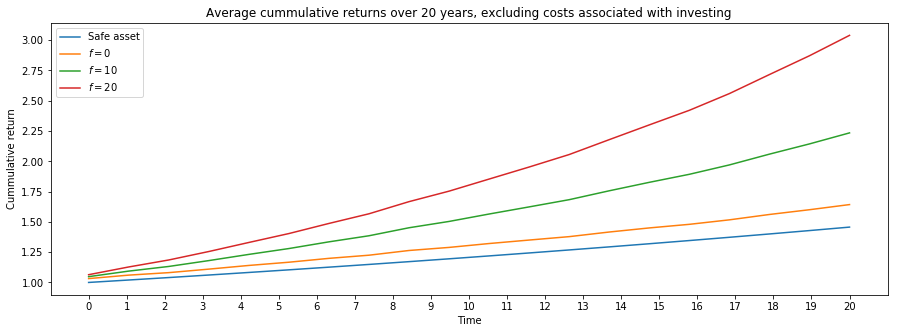

In [230]:
# Plot
plt.figure(figsize=(15,5))
x = np.linspace(0,timesteps,timesteps)
plt.plot(x,safe_cr, label = 'Safe asset')
plt.plot(x,f0_cr, label = '$f=0$')
plt.plot(x,f10_cr, label = '$f=10$')
plt.plot(x,f50_cr, label = '$f=20$')

plt.title('Average cummulative returns over 20 years, excluding costs associated with investing'); plt.ylabel('Cummulative return'); plt.xlabel('Time'); plt.xticks(range(0,timesteps+1))
plt.legend()
plt.show()

In [340]:
# Function that returns cummulative return over the time-horizon as a function of financial literacy averaged over all shocks
def cum_ret_avg_list(shocks, par, f = 0):
    a_cr = [] # Initialize cummalative return
    for j in range(len(shocks)):       
        a = agent.R_riskful(f, par, shocks[j])
        a_cr_j = []   
        for i in range(len(a)):
            a_cr_j.append(np.prod(a[:i+1]))
        a_cr.append(a_cr_j)     
    return a_cr

In [410]:
f0_cr = cum_ret_avg_list(shocks, par, f = 0)
f10_cr = cum_ret_avg_list(shocks, par, f = 10)
f20_cr = cum_ret_avg_list(shocks, par, f = 20)
f50_cr = cum_ret_avg_list(shocks, par, f = 50)

In [411]:
time_series_f0 = pd.DataFrame(f0_cr)
time_series_f10 = pd.DataFrame(f10_cr)
time_series_f20 = pd.DataFrame(f20_cr)
time_series_f50 = pd.DataFrame(f50_cr)

In [412]:
mean_0 = time_series_f0.mean()
sd_0 = time_series_f0.std()

mean_10 = time_series_f10.mean()
sd_10 = time_series_f10.std()

mean_20 = time_series_f20.mean()
sd_20 = time_series_f20.std()

mean_50 = time_series_f50.mean()
sd_50 = time_series_f50.std()

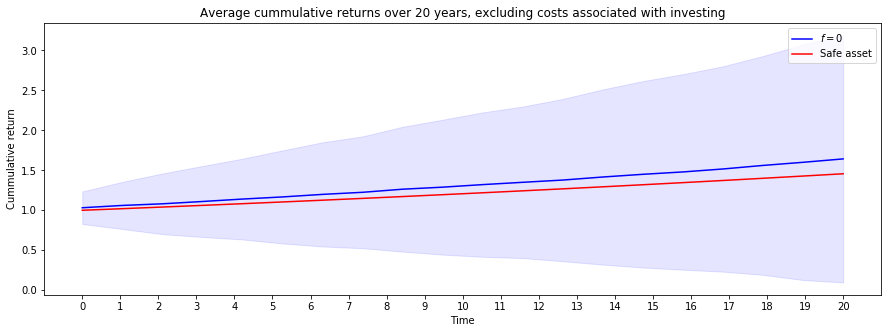

In [425]:
plt.figure(figsize=(15,5))
x = np.linspace(0,timesteps,timesteps)
plt.plot(x,mean_0, color = 'b', label = '$f=0$')
plt.plot(x,safe_cr, label = 'Safe asset', color = 'r')
plt.fill_between(x, mean_0 - 1.96 * sd_0, mean_0 + 1.96 * sd_0, color='b', alpha=.1 )
plt.title('Average cummulative returns over 20 years, excluding costs associated with investing'); plt.ylabel('Cummulative return'); plt.xlabel('Time'); plt.xticks(range(0,timesteps+1))
plt.legend()
plt.show()

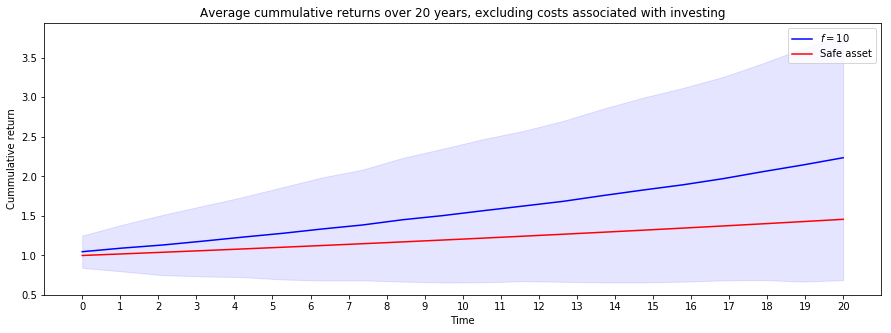

In [424]:
plt.figure(figsize=(15,5))
x = np.linspace(0,timesteps,timesteps)
plt.plot(x,mean_10, color = 'b', label = '$f=10$')
plt.plot(x,safe_cr, label = 'Safe asset', color = 'r')
plt.fill_between(x, mean_10 - 1.96 * sd_0, mean_10 + 1.96 * sd_0, color='b', alpha=.1 )
plt.title('Average cummulative returns over 20 years, excluding costs associated with investing'); plt.ylabel('Cummulative return'); plt.xlabel('Time'); plt.xticks(range(0,timesteps+1))
plt.legend()
plt.show()

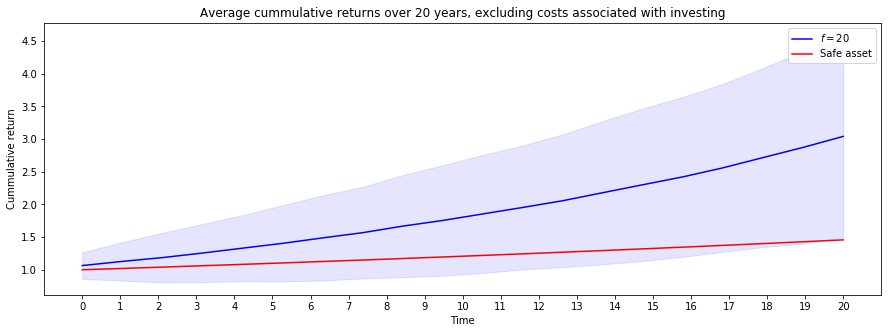

In [426]:
plt.figure(figsize=(15,5))
x = np.linspace(0,timesteps,timesteps)
plt.plot(x,mean_20, color = 'b', label = '$f=20$')
plt.plot(x,safe_cr, label = 'Safe asset', color = 'r')
plt.fill_between(x, mean_20 - 1.96 * sd_0, mean_20 + 1.96 * sd_0, color='b', alpha=.1 )
plt.title('Average cummulative returns over 20 years, excluding costs associated with investing'); plt.ylabel('Cummulative return'); plt.xlabel('Time'); plt.xticks(range(0,timesteps+1))
plt.legend()
plt.show()

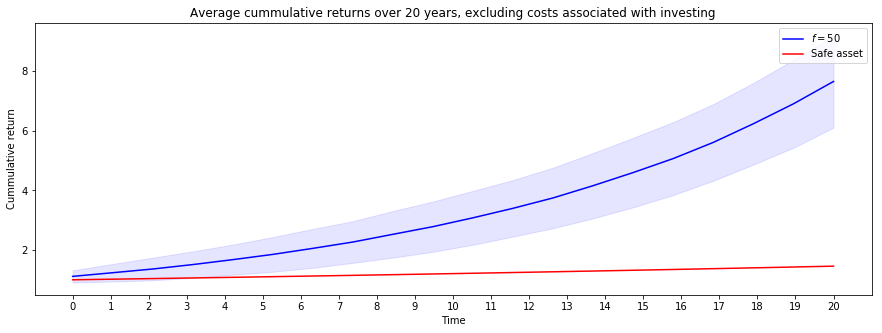

In [427]:
plt.figure(figsize=(15,5))
x = np.linspace(0,timesteps,timesteps)
plt.plot(x,mean_50, color = 'b', label = '$f=50$')
plt.plot(x,safe_cr, label = 'Safe asset', color = 'r')
plt.fill_between(x, mean_50 - 1.96 * sd_0, mean_50 + 1.96 * sd_0, color='b', alpha=.1 )
plt.title('Average cummulative returns over 20 years, excluding costs associated with investing'); plt.ylabel('Cummulative return'); plt.xlabel('Time'); plt.xticks(range(0,timesteps+1))
plt.legend()
plt.show()

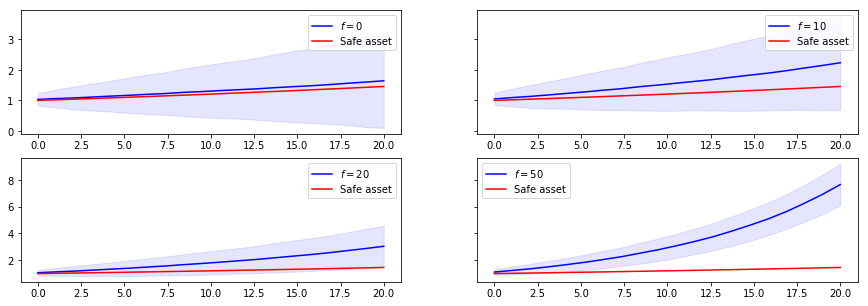

In [451]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='row', sharey='row', figsize = (15,5))
x = np.linspace(0,timesteps,timesteps)

l1 = ax1.plot(x,mean_0, color = 'b', label = '$f=0$')
l2 = ax1.plot(x,safe_cr, label = 'Safe asset', color = 'r')
ax1.fill_between(x, mean_0 - 1.96 * sd_0, mean_0 + 1.96 * sd_0, color='b', alpha=.1 )
ax1.legend()

l3 = ax2.plot(x,mean_10, color = 'b', label = '$f=10$')
l4 = ax2.plot(x,safe_cr, label = 'Safe asset', color = 'r')
ax2.fill_between(x, mean_10 - 1.96 * sd_0, mean_10 + 1.96 * sd_0, color='b', alpha=.1 )
ax2.legend()

l5 = ax3.plot(x,mean_20, color = 'b', label = '$f=20$')
l6 = ax3.plot(x,safe_cr, label = 'Safe asset', color = 'r')
ax3.fill_between(x, mean_20 - 1.96 * sd_0, mean_20 + 1.96 * sd_0, color='b', alpha=.1 )
ax3.legend()

l7 = ax4.plot(x,mean_50, color = 'b', label = '$f=50$')
l8 = ax4.plot(x,safe_cr, label = 'Safe asset', color = 'r')
ax4.fill_between(x, mean_50 - 1.96 * sd_0, mean_50 + 1.96 * sd_0, color='b', alpha=.1 )

ax4.legend()

#ax1.legend((l1, l2), ('pwn', 'own'))

plt.show()

In [428]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')

NameError: name 'y' is not defined